In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [3]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.set_index("Month")

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-07,4298.0
1972-08,1413.0
1972-09,5877.0


In [7]:
df.dropna(inplace=True)

In [9]:
df.columns =["Month", "Sales"]

In [10]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [11]:
df = df.set_index("Month")

In [12]:
df

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-05,4618.0
1972-06,5312.0
1972-07,4298.0


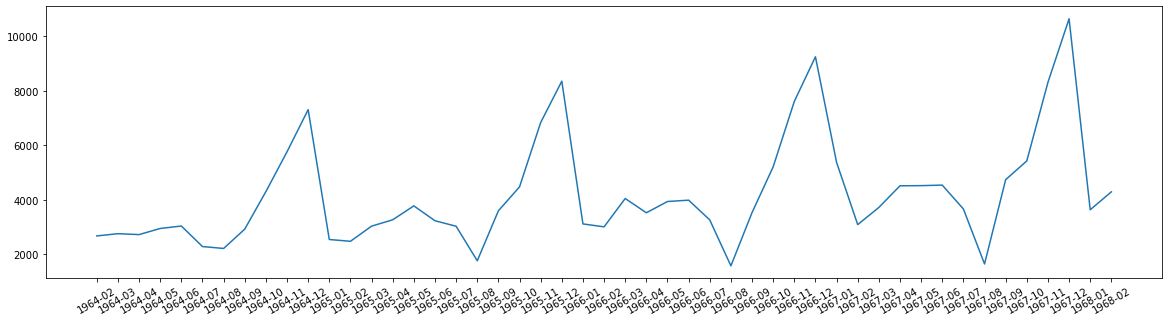

In [14]:
plt.plot(df[1:50]['Sales'])
plt.xticks(rotation = 30)
plt.show()

Moving average method

we have seen how to calculate moving average using window, same applies to our dataset and we will ge rolling statistics and find its mean. after the mean, if we plot the graph then you can see the difference in smoothing of a graph as the original.

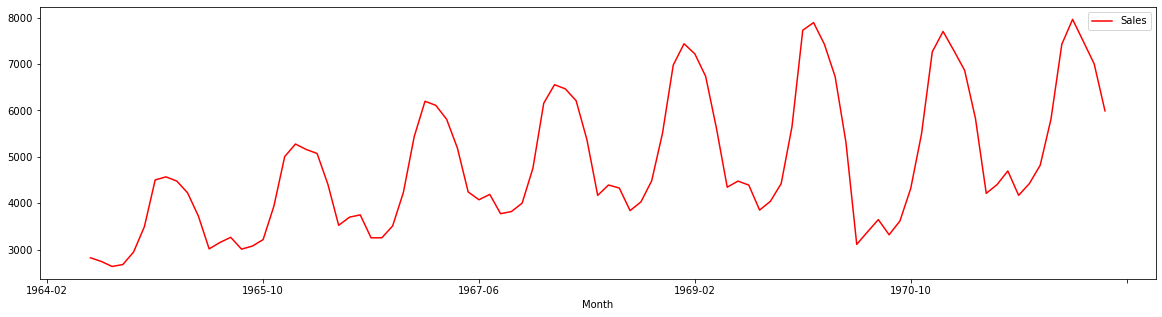

In [20]:
rollingseries = df[1:100].rolling(window=5)
rollingmean = rollingseries.mean()
rollingmean.plot(color="red")
plt.show()

#### simple exponential smoothing
now as we have seen in simple exponential smoothing has parameter known as alpha which defines how much weightage we want to give to recent observation. we will fit 2 models, one with high value and one with less value of alpha, and compare both.

C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\KIIT01\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


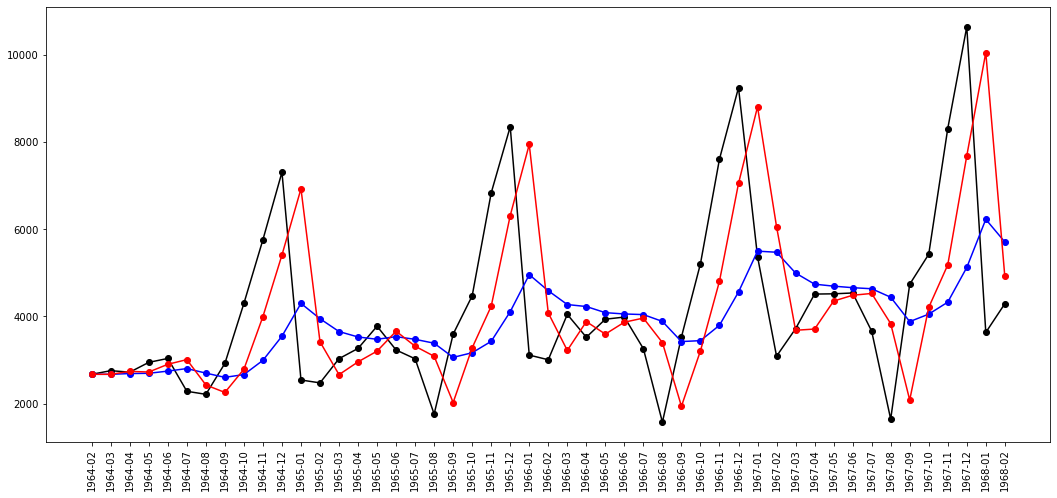

In [23]:
data = df [1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18,8))
plt.plot(df[1:50],marker='o', color="black")
plt.plot(fit1.fittedvalues, marker ='o', color="b")
plt.plot(fit2.fittedvalues, marker = 'o', color='r')
plt.xticks(rotation="vertical")
plt.show()